### Customer Churn Analysis
Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

In [263]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
display(df.head())

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [264]:
df.shape

(7043, 21)

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [266]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [267]:
[i for i in df.columns if df[i].isnull().sum()>0]

[]

In [268]:
df['TotalCharges'].mode()[1]

'20.2'

In [269]:
df['TotalCharges'] = df['TotalCharges'].str.replace(' ','20.2').astype(float)

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [271]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [272]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [273]:
df.select_dtypes(exclude=['int']).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'],
      dtype='object')

In [274]:
features = ['gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod','SeniorCitizen' ]

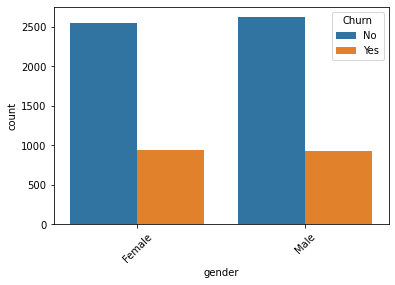

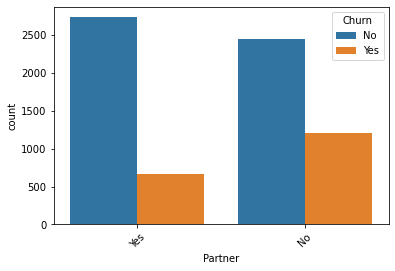

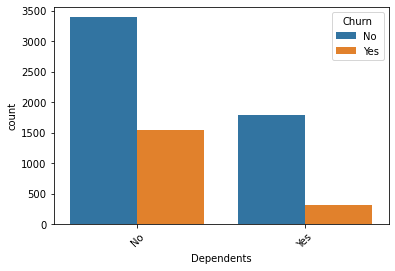

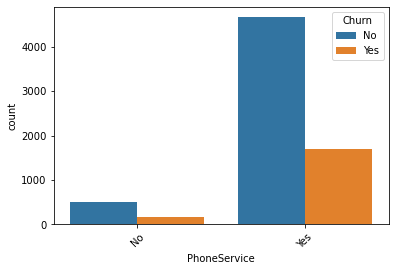

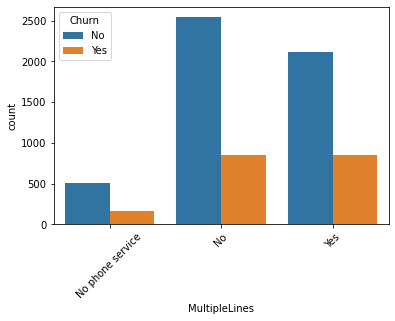

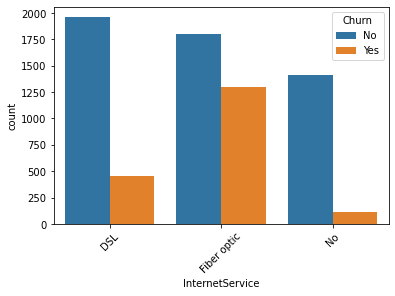

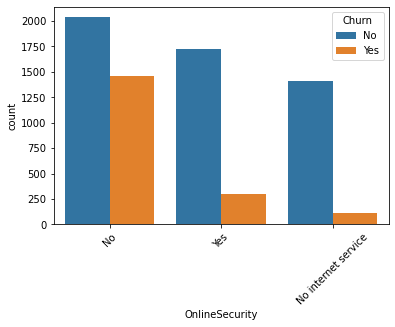

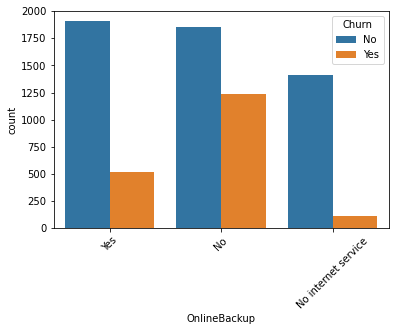

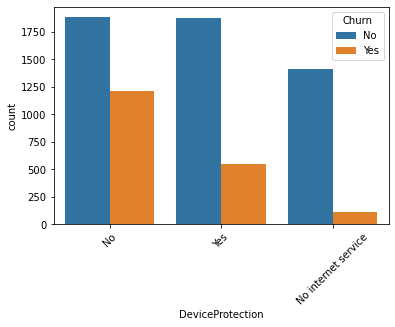

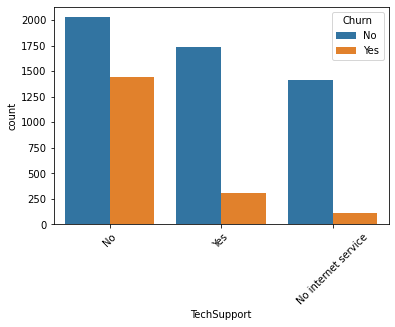

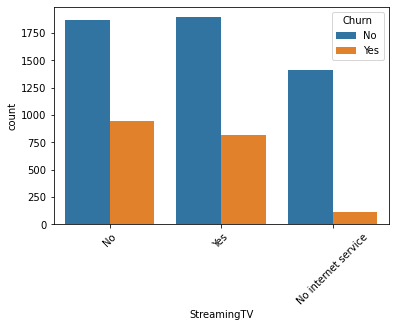

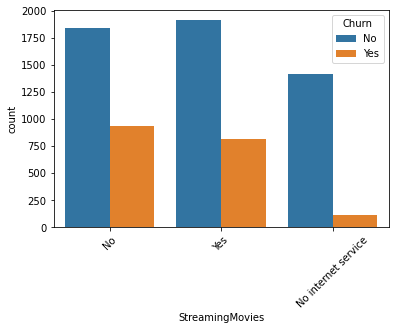

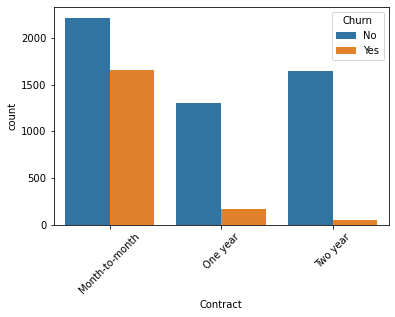

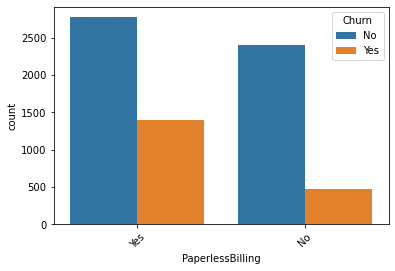

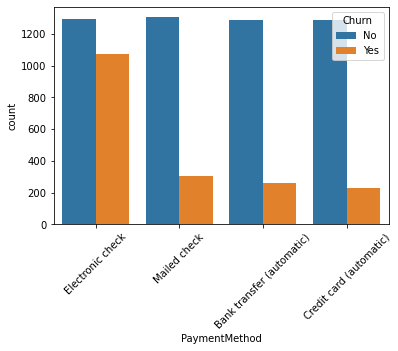

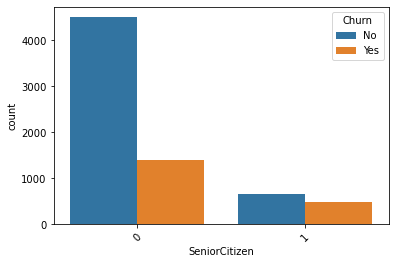

In [275]:
for i in features:
    sns.countplot(x = df[i], hue = df['Churn'])
    plt.xticks(rotation = 45)
    plt.show()
    

In [276]:
df.select_dtypes(include='int').columns

Index(['SeniorCitizen', 'tenure'], dtype='object')

In [277]:
car = ['SeniorCitizen', 'tenure']

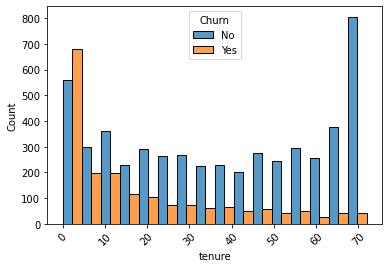

In [278]:
sns.histplot(x = df['tenure'],hue=df['Churn'],multiple='dodge')
plt.xticks(rotation = 45)
plt.show()

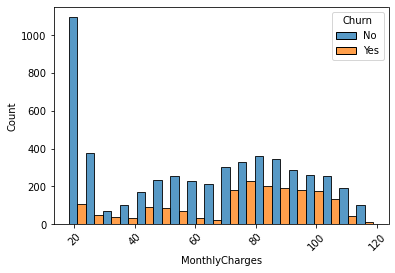

In [164]:
sns.histplot(x='MonthlyCharges',hue='Churn',data=df,multiple='dodge')
plt.xticks(rotation = 45)
plt.show()

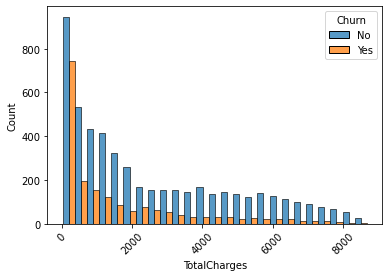

In [166]:
sns.histplot(x='TotalCharges',hue='Churn',data=df,multiple='dodge')
plt.xticks(rotation = 45)
plt.show()

In [279]:
df.select_dtypes(include=['object']).columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [280]:
category = ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
lab = LabelEncoder()
for i in category:
    df[i] = lab.fit_transform(df[i])

print(df.dtypes)

customerID          int32  
gender              int32  
SeniorCitizen       int64  
Partner             int32  
Dependents          int32  
tenure              int64  
PhoneService        int32  
MultipleLines       int32  
InternetService     int32  
OnlineSecurity      int32  
OnlineBackup        int32  
DeviceProtection    int32  
TechSupport         int32  
StreamingTV         int32  
StreamingMovies     int32  
Contract            int32  
PaperlessBilling    int32  
PaymentMethod       int32  
MonthlyCharges      float64
TotalCharges        float64
Churn               int32  
dtype: object


In [281]:
df.corr()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,1.000000,0.006288,-0.002074,-0.026729,-0.012823,0.008035,-0.006483,0.004316,-0.012407,0.013292,-0.003334,-0.006918,0.001140,-0.007777,-0.016746,0.015028,-0.001945,0.011604,-0.003916,0.000371,-0.017447
gender,0.006288,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.000079,-0.008612
SeniorCitizen,-0.002074,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.103001,0.150889
Partner,-0.026729,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.317518,-0.150448
Dependents,-0.012823,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.062100,-0.164221
tenure,0.008035,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.826172,-0.352229
PhoneService,-0.006483,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.113211,0.011942
MultipleLines,0.004316,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.452583,0.038037
InternetService,-0.012407,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.175753,-0.047291
OnlineSecurity,0.013292,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.253235,-0.289309


<AxesSubplot:>

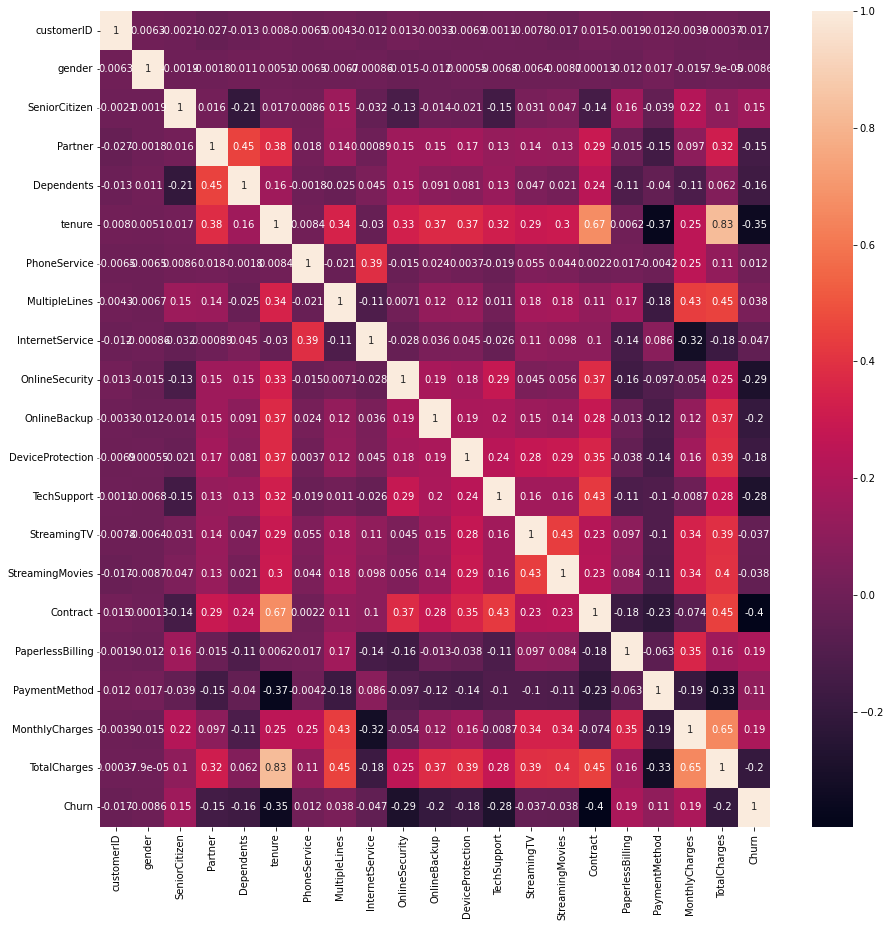

In [282]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(),annot=True)

In [283]:
z = np.abs(zscore(df))
print(z)

      customerID    gender  SeniorCitizen   Partner  Dependents    tenure  \
0     0.911890    1.009559  0.439916       1.034530  0.654012    1.277445   
1     0.216906    0.990532  0.439916       0.966622  0.654012    0.066327   
2     0.470701    0.990532  0.439916       0.966622  0.654012    1.236724   
3     0.990587    0.990532  0.439916       0.966622  0.654012    0.514251   
4     1.470632    1.009559  0.439916       0.966622  0.654012    1.236724   
5     1.490306    1.009559  0.439916       0.966622  0.654012    0.992402   
6     1.238971    0.990532  0.439916       0.966622  1.529024    0.422317   
7     0.614321    1.009559  0.439916       0.966622  0.654012    0.910961   
8     1.024524    1.009559  0.439916       1.034530  0.654012    0.177995   
9     0.498244    0.990532  0.439916       0.966622  1.529024    1.206498   
10    1.647698    0.990532  0.439916       1.034530  1.529024    0.788800   
11    0.869099    0.990532  0.439916       0.966622  0.654012    0.666639   

In [284]:
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([   0,    0,    0, ..., 7042, 7042, 7042], dtype=int64), array([ 0,  1,  2, ..., 18, 19, 20], dtype=int64))
(7043, 21)


In [285]:
df_new = df[(z<3).all(axis = 1)]

In [287]:
df_new.skew()

customerID          0.006843
gender             -0.014781
SeniorCitizen       1.823376
Partner             0.056316
Dependents          0.876594
tenure              0.237945
PhoneService        0.000000
MultipleLines       0.132058
InternetService     0.049126
OnlineSecurity      0.422032
OnlineBackup        0.167910
DeviceProtection    0.183254
TechSupport         0.409833
StreamingTV        -0.002734
StreamingMovies    -0.010025
Contract            0.629701
PaperlessBilling   -0.386613
PaymentMethod      -0.169889
MonthlyCharges     -0.399139
TotalCharges        0.900393
Churn               1.053055
dtype: float64

In [204]:
print(df.shape)
print(df_new.shape)

print('Shape after removing outliers',df.shape)

(7043, 21)
(6361, 21)
Shape after removing outliers (7043, 21)


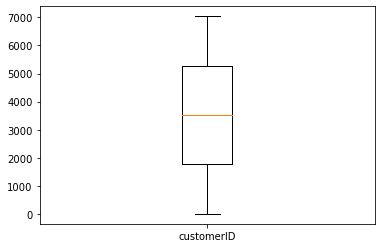

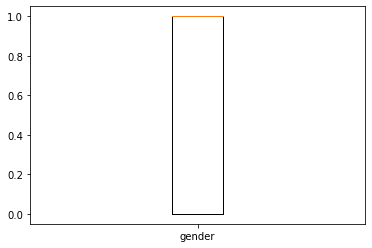

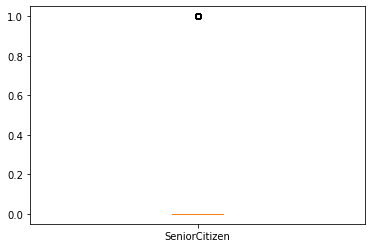

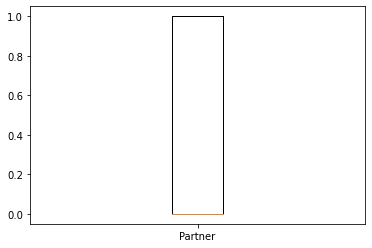

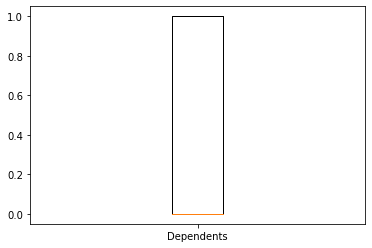

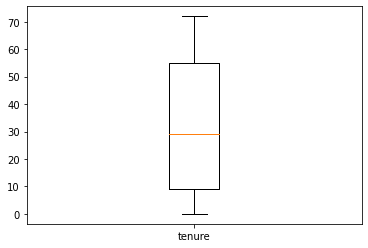

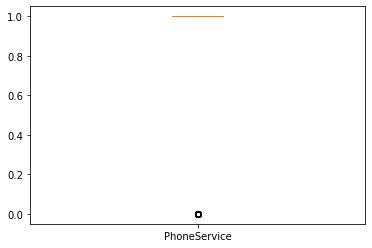

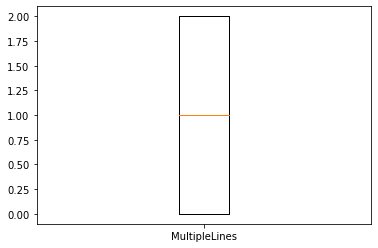

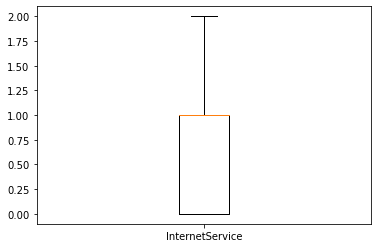

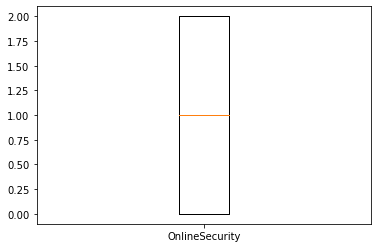

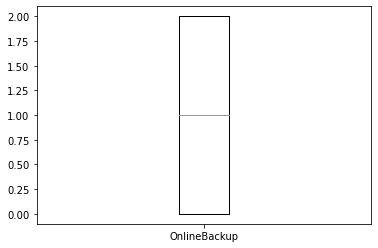

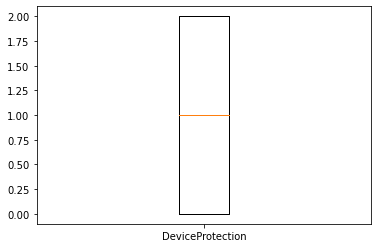

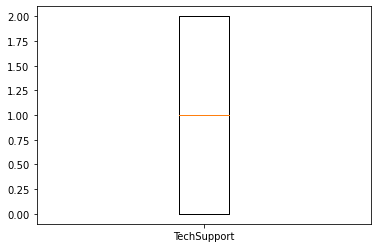

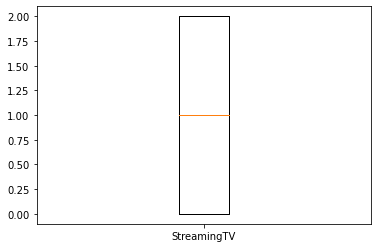

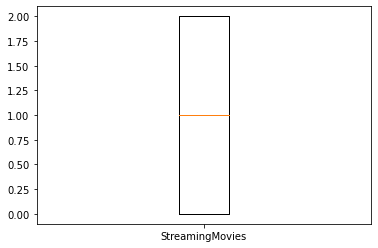

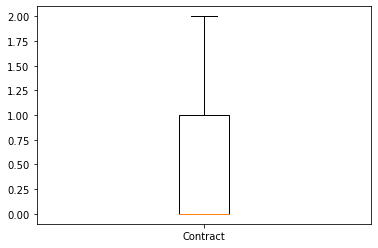

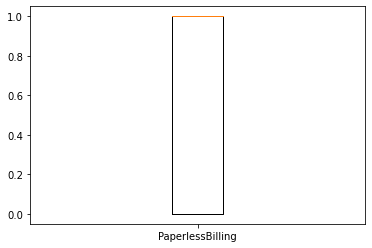

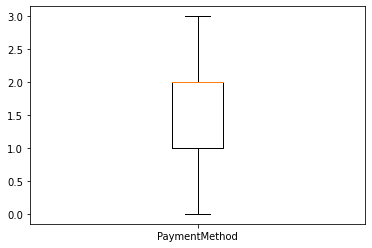

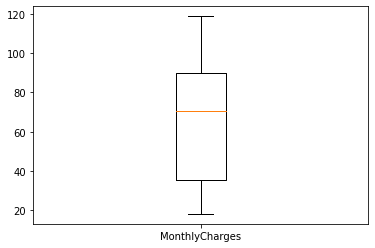

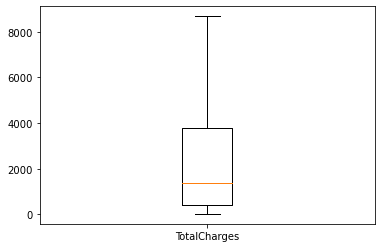

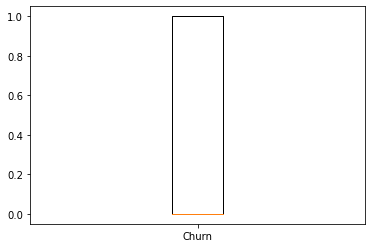

In [288]:
for i in df_new.columns:
    plt.boxplot(df[i], labels = [i])
    plt.show()

In [205]:
X = df_new.drop(['Churn'],axis=1)
y = df_new['Churn']

In [206]:
from sklearn.preprocessing import StandardScaler

In [207]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

In [208]:
from imblearn.over_sampling import RandomOverSampler
ROS = RandomOverSampler(random_state=42)

In [209]:
ROS.fit(X,y)

RandomOverSampler(random_state=42)

In [210]:
X_ros, Y_ros= ROS.fit_resample(X, y)

In [211]:
Y_ros.value_counts(normalize=True)

0    0.5
1    0.5
Name: Churn, dtype: float64

In [212]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score for the random state is 42 is 0.36126212648679856
R2 score for the random state is 42 is 0.4086586780399596
R2 score for the random state is 42 is 0.33531089545810555
R2 score for the random state is 42 is 0.3979862884728178
R2 score for the random state is 42 is 0.31747508109103995
R2 score for the random state is 42 is 0.675517340002603
R2 score for the random state is 42 is 0.647496787332726
R2 score for the random state is 43 is 0.3699789527482744
R2 score for the random state is 43 is 0.42351918998653937
R2 score for the random state is 43 is 0.3457427877331958
R2 score for the random state is 43 is 0.39811447498500185
R2 score for the random state is 43 is 0.3298401169422637
R2 score for the random state is 43 is 0.6697653019459394
R2 score for the random state is 43 is 0.6401917931710448
R2 score for the random state is 44 is 0.37589554777308254
R2 score for the random state is 44 is 0.4231557093947873
R2 score for the random state is 44 is 0.35079086286957417
R2 score 

In [213]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

In [214]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [215]:
ETR=ExtraTreesRegressor()
RandomizedSearch_ETR=RandomizedSearchCV(estimator=ETR,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,
                               random_state=63,n_jobs=-1)
RandomizedSearch_ETR.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=63, verbose=2)

In [216]:
RandomizedSearch_ETR.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'log2',
 'max_depth': 560}

In [217]:
RandomizedSearch_ETR.best_estimator_

ExtraTreesRegressor(max_depth=560, max_features='log2', n_estimators=1000)

In [218]:
ETR = ExtraTreesRegressor(n_estimators=1000,min_samples_split=2,min_samples_leaf=1,max_features='log2',max_depth=560,random_state=63)
ETR.fit(X_train,y_train)
pred = ETR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 68.48603392013092


In [219]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  0.15201494962625933
Mean squared Error:  0.07874296782580435
Root Mean Absolute Error:  0.389890945812107


Text(0, 0.5, 'Predicted_Y')

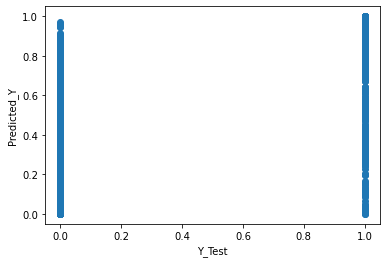

In [220]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

In [245]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [246]:
classification_model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros,random_state = r_state,test_size = 0.33)
    for j in classification_model:
        j.fit(X_train,y_train)
        pred_c = j.predict(X_test)
        ac_score = accuracy_score(y_test,pred_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model_classification = j
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model_classification)

accuracy score correspond to random state  40 is 0.8436789080272993
accuracy score correspond to random state  40 is 0.7676308092297692
accuracy score correspond to random state  41 is 0.848228794280143
accuracy score correspond to random state  41 is 0.7536561585960351
accuracy score correspond to random state  42 is 0.8544036399090023
accuracy score correspond to random state  42 is 0.7660058498537536
accuracy score correspond to random state  43 is 0.8492037699057523
accuracy score correspond to random state  43 is 0.7663308417289568
accuracy score correspond to random state  44 is 0.8524536886577836
accuracy score correspond to random state  44 is 0.7556061098472538
accuracy score correspond to random state  45 is 0.8596035099122522
accuracy score correspond to random state  45 is 0.7559311017224569
accuracy score correspond to random state  46 is 0.8495287617809555
accuracy score correspond to random state  46 is 0.747806304842379
accuracy score correspond to random state  47 is 0

In [247]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [252]:
dec = DecisionTreeClassifier(random_state=67)
grid_search = GridSearchCV(estimator=dec, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [253]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=67), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [254]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=20, min_samples_leaf=5, random_state=67)

In [255]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5}

In [256]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth=20, min_samples_leaf=5, random_state=67)
DTC.fit(X_train,y_train)
predc = DTC.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 79.49301267468313


In [257]:
pred_prob = DTC.predict_proba(X_test)[:,1]

In [258]:
fpr,tpr,thresholds = roc_curve(y_test,pred_prob,pos_label=True)

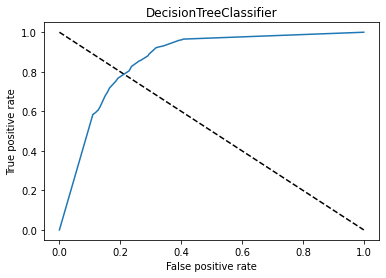

In [259]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()

In [260]:
confusion_matrix(y_test, predc)

array([[1183,  367],
       [ 264, 1263]], dtype=int64)

[Text(0.6029356978349698, 0.9761904761904762, 'X[15] <= -0.229\ngini = 0.5\nsamples = 6247\nvalue = [3112, 3135]'),
 Text(0.3248283195758247, 0.9285714285714286, 'X[18] <= 0.047\ngini = 0.439\nsamples = 4119\nvalue = [1338, 2781]'),
 Text(0.15883374244147758, 0.8809523809523809, 'X[5] <= -1.095\ngini = 0.5\nsamples = 1216\nvalue = [621, 595]'),
 Text(0.10182302580374783, 0.8333333333333334, 'X[0] <= 1.012\ngini = 0.465\nsamples = 653\nvalue = [240, 413]'),
 Text(0.06474884751242292, 0.7857142857142857, 'X[5] <= -1.258\ngini = 0.442\nsamples = 548\nvalue = [181, 367]'),
 Text(0.035083517930910614, 0.7380952380952381, 'X[0] <= -0.542\ngini = 0.386\nsamples = 322\nvalue = [84, 238]'),
 Text(0.022750404119020535, 0.6904761904761905, 'X[4] <= 0.438\ngini = 0.479\nsamples = 113\nvalue = [45, 68]'),
 Text(0.01676345566664671, 0.6428571428571429, 'X[18] <= -0.572\ngini = 0.455\nsamples = 100\nvalue = [35, 65]'),
 Text(0.010537029276177933, 0.5952380952380952, 'X[0] <= -0.99\ngini = 0.425\nsamp

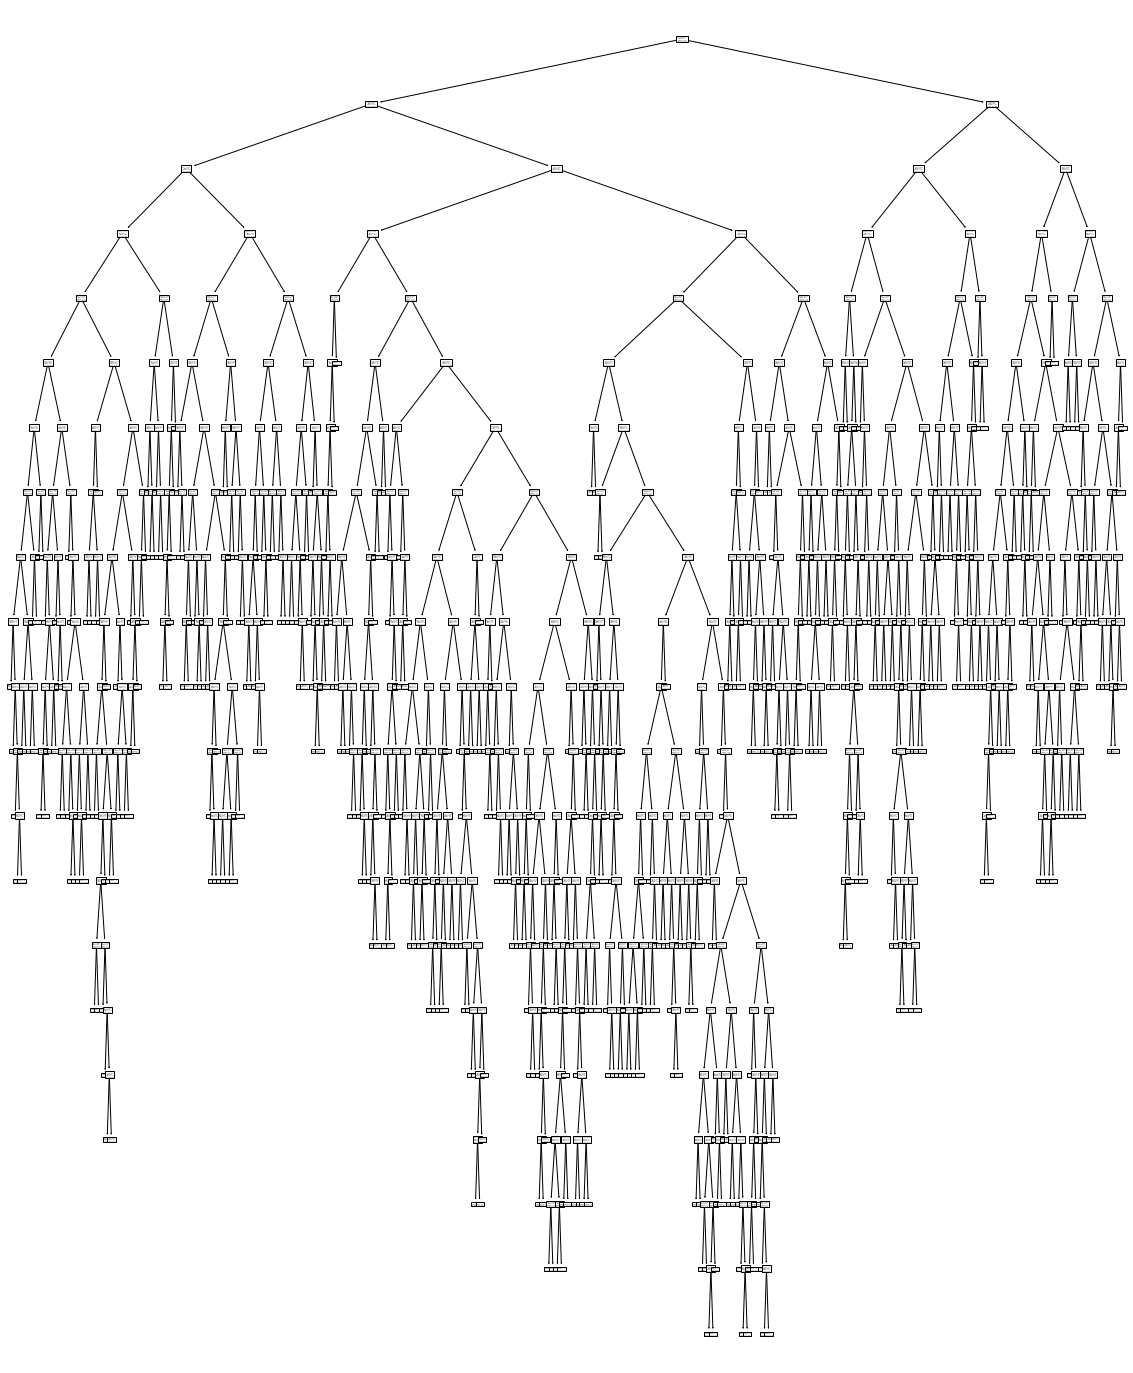

In [261]:
from sklearn import tree
g = plt.figure()
g.set_figwidth(20)
g.set_figheight(25)
tree.plot_tree(DTC)

In [233]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros, test_size = 0.3, random_state = 12345)

In [234]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6526, 20), (2798, 20), (6526,), (2798,))

In [235]:
log_reg = LogisticRegression(max_iter = 5000)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [236]:
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, log_reg.predict(X_test))
accuracy

0.7651894210150108

In [237]:
from sklearn.model_selection import RepeatedStratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X_ros, Y_ros, test_size = 0.3, random_state = 12345)
# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [238]:
grid_result.best_params_

{'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}

In [239]:
grid_result.best_estimator_

LogisticRegression(solver='newton-cg')

In [240]:
LR = LogisticRegression(C= 1, penalty= 'l2', solver= 'newton-cg')
LR.fit(X_train,y_train)
predc = LR.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 76.51894210150107
